In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import linregress

In [46]:
df = pd.read_csv('data/epa-sea-level_csv.csv')
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880-03-15,0.000000,-0.952756,0.952756,NaN
1,1881-03-15,0.220472,-0.732283,1.173228,NaN
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN
4,1884-03-15,0.590551,-0.283465,1.464567,NaN


In [47]:
df['Year'] = pd.to_datetime(df.Year, format='%Y-%m-%d')
df['Year'] = df.Year.dt.year

df.dropna(thresh=3, inplace=True)
df.sample(3)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
80,1960,4.503937,4.244094,4.763780,NaN
112,1992,6.358268,6.094488,6.622047,NaN
127,2007,7.996063,7.712598,8.279528,7.702147


In [27]:
df.dtypes

Year                         object
CSIRO Adjusted Sea Level    float64
Lower Error Bound           float64
Upper Error Bound           float64
NOAA Adjusted Sea Level     float64
dtype: object

Text(0, 0.5, 'CSIRO Adjusted Sea Level')

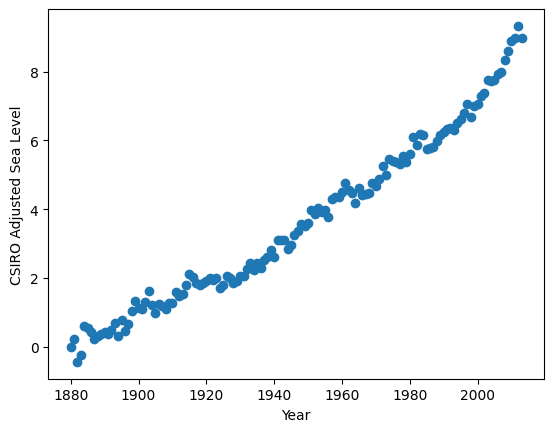

In [48]:
x = df['Year']
y = df['CSIRO Adjusted Sea Level']

plt.scatter(x,y)
plt.xlabel("Year")
plt.ylabel('CSIRO Adjusted Sea Level')

In [89]:
df['Year'] = pd.to_datetime(df.Year)
df['Year'] = df.Year.dt.year

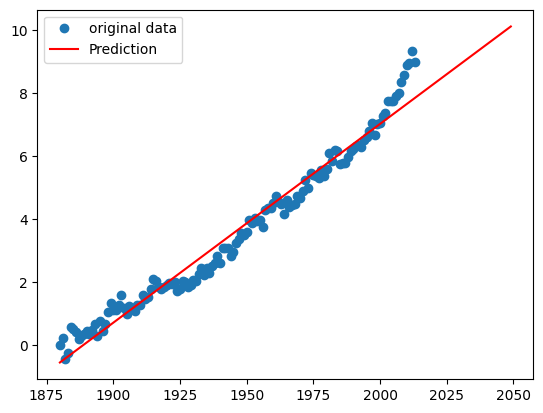

In [52]:
# Create first line of best fit
result = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
start_year = df["Year"].min()
end_year = 2050
best_fit = {
    "Year": [],
    "Pred": []
}
for year in range(start_year, end_year):
    best_fit["Year"] = [year for year in range(start_year, end_year)]
    best_fit["Pred"] = [result.slope * year + result.intercept for year in range(start_year, end_year)]
    # print(best_fit)

plt.plot(df['Year'], df['CSIRO Adjusted Sea Level'], 'o', label='Original Data')
plt.plot(best_fit["Year"], best_fit["Pred"], 'r', label='Prediction')
plt.legend()

In [ ]:
x = df['Year']
y = df['CSIRO Adjusted Sea Level']

res = linregress(x, y)
temp = np.arange(x.min(),2050,1)
xA = x.to_numpy().append(temp)
# print(f"R-squared: {res.rvalue**2:.6f}")

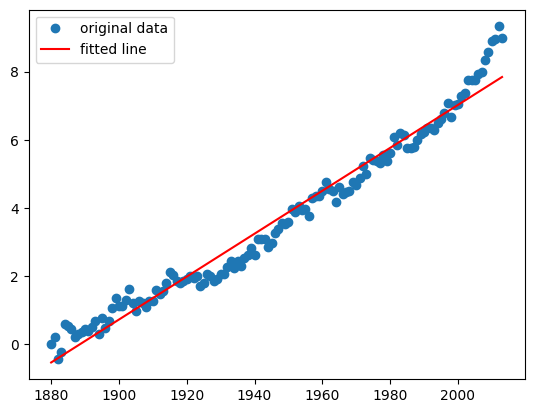

In [126]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()